# Project

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("./dataset/aps_failure_training_set.csv", delimiter=',', on_bad_lines='skip')

In [3]:
data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


# Data Cleaning

In [4]:
data_dublicates=data.duplicated()
data_dublicates

0        False
1        False
2        False
3        False
4        False
         ...  
59995    False
59996    False
59997    False
59998    False
59999    False
Length: 60000, dtype: bool

In [5]:
data_dublicates.any()

False

Result: The analysis shows that in this dataset we don't have any duplicates.

In [6]:
data_cleaned = pd.read_csv("./dataset/aps_failure_training_set.csv", delimiter=',', na_values="na")
data_cleaned.head(10)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0
5,neg,38312,NaN,2.130706e+09,218.0,0.0,0.0,0.0,0.0,0.0,...,388574.0,288278.0,900430.0,300412.0,1534.0,338.0,856.0,0.0,0.0,0.0
6,neg,14,0.0,6.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,168.0,48.0,60.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0
7,neg,102960,NaN,2.130706e+09,116.0,0.0,0.0,0.0,0.0,0.0,...,715518.0,384948.0,915978.0,1052166.0,1108672.0,341532.0,129504.0,7832.0,0.0,0.0
8,neg,78696,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,699290.0,362510.0,1190028.0,1012704.0,160090.0,63216.0,41202.0,4.0,0.0,0.0
9,pos,153204,0.0,1.820000e+02,NaN,0.0,0.0,0.0,0.0,0.0,...,129862.0,26872.0,34044.0,22472.0,34362.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data_cleaned.isnull().any().value_counts()

True     169
False      2
dtype: int64

In [8]:
data_cleaned.isnull().sum(axis = 0)

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
          ...  
ee_007      671
ee_008      671
ee_009      671
ef_000     2724
eg_000     2723
Length: 171, dtype: int64

In [9]:
data_cleaned.isna().sum(axis = 0).value_counts()

671      40
688      10
669      10
687      10
13808     9
629       6
2723      6
2724      5
2726      5
14861     5
642       5
4008      4
589       4
691       4
2500      4
4007      3
338       3
2727      3
726       2
9553      2
46329     2
0         2
2503      2
645       2
9877      1
3255      1
4006      1
4009      1
2502      1
676       1
48722     1
4356      1
473       1
3257      1
167       1
49264     1
47740     1
46333     1
44009     1
39549     1
27277     1
23034     1
2725      1
2501      1
4400      1
3335      1
10239     1
dtype: int64

In [10]:
data_cleaned.isnull().sum(axis = 0).index

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [11]:
represent_numberNan=pd.DataFrame(data_cleaned.isnull().sum(axis = 0), columns=['Number of NaN'])

In [12]:
represent_numberNan

,Number of NaN
class,0
aa_000,0
ab_000,46329
ac_000,3335
ad_000,14861
...,...
ee_007,671
ee_008,671
ee_009,671
ef_000,2724


In [13]:
represent_numberNan.sort_values(by=['Number of NaN'], ascending=False).head()

,Number of NaN
br_000,49264
bq_000,48722
bp_000,47740
bo_000,46333
ab_000,46329


In [14]:
df_test=represent_numberNan.sort_values(by=['Number of NaN'], ascending=False)
df_test.head()

,Number of NaN
br_000,49264
bq_000,48722
bp_000,47740
bo_000,46333
ab_000,46329


In [15]:
df_test[df_test>=20000].dropna().value_counts()

Number of NaN
46329.0          2
23034.0          1
27277.0          1
39549.0          1
44009.0          1
46333.0          1
47740.0          1
48722.0          1
49264.0          1
dtype: int64

In [16]:
df_test[(df_test<=20000) & (df_test>=10000)].dropna().value_counts()

Number of NaN
13808.0          9
14861.0          5
10239.0          1
dtype: int64

In [17]:
df_test[(df_test<=20000) & (df_test>=10000)].dropna().value_counts().sum(axis=0)

15

In [18]:
df_test[(df_test<=10000) & (df_test>=4000)].dropna().value_counts()

Number of NaN
4008.0           4
4007.0           3
9553.0           2
4006.0           1
4009.0           1
4356.0           1
4400.0           1
9877.0           1
dtype: int64

In [19]:
df_test[(df_test<=10000) & (df_test>=4000)].dropna().value_counts().sum(axis=0)

14

In [20]:
df_test[(df_test<=4000) & (df_test>=2000)].dropna().value_counts()

Number of NaN
2723.0           6
2724.0           5
2726.0           5
2500.0           4
2727.0           3
2503.0           2
2501.0           1
2502.0           1
2725.0           1
3255.0           1
3257.0           1
3335.0           1
dtype: int64

In [21]:
df_test[(df_test<=4000) & (df_test>=2000)].dropna().value_counts().sum(axis=0)

31

In [22]:
df_test[(df_test<=2000) & (df_test>=100)].dropna().value_counts()

Number of NaN
671.0            40
669.0            10
687.0            10
688.0            10
629.0             6
642.0             5
589.0             4
691.0             4
338.0             3
645.0             2
726.0             2
167.0             1
473.0             1
676.0             1
dtype: int64

In [23]:
df_test[(df_test<=2000) & (df_test>=100)].dropna().value_counts().sum(axis=0)

99

In [24]:
df_test[df_test<=100].dropna().value_counts()

Number of NaN
0.0              2
dtype: int64

(-0.5, 170.5)

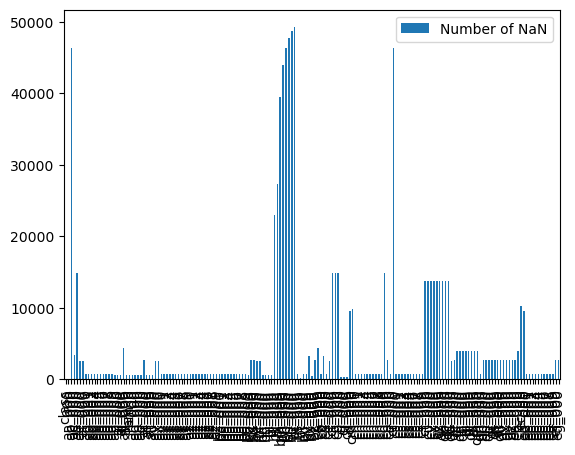

In [25]:
ax = represent_numberNan.plot.bar()
ax.get_xlim()

(151.5, 170.5)

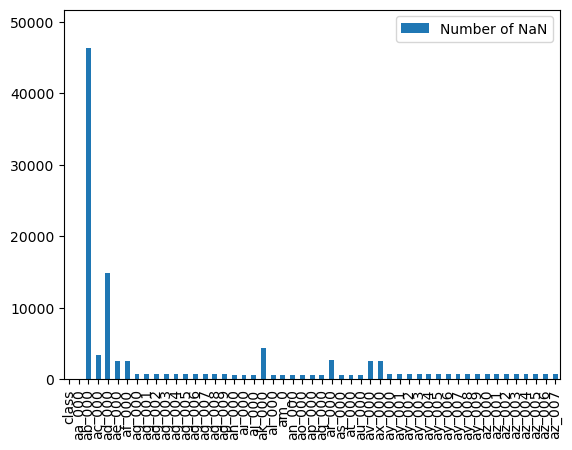

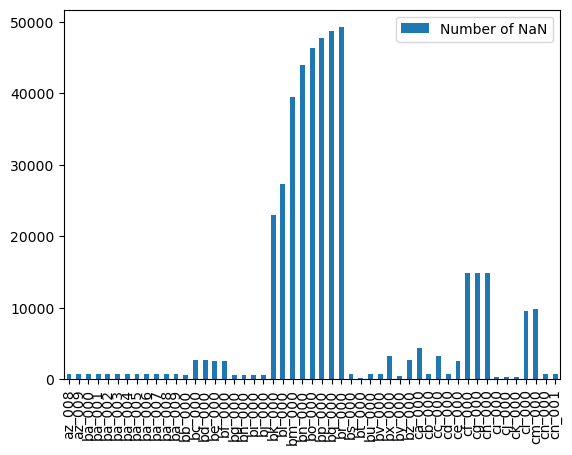

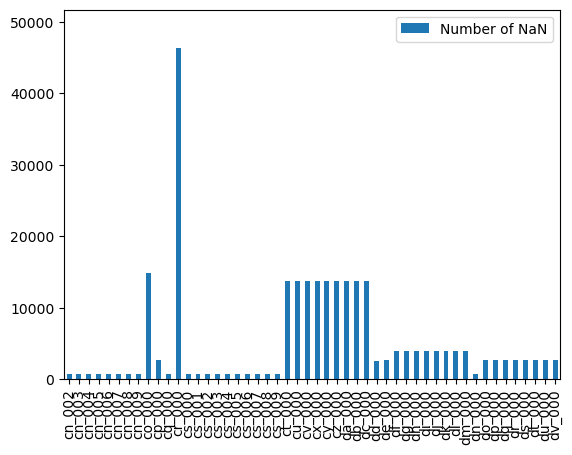

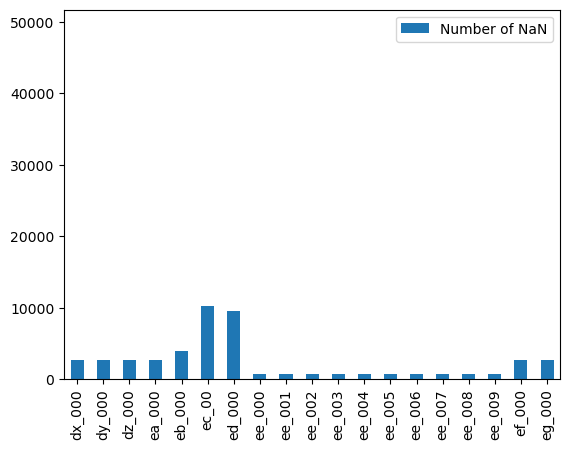

In [26]:
ax = represent_numberNan.plot.bar()
ax.set_xlim(-0.5,50.5)
ax1 = represent_numberNan.plot.bar()
ax1.set_xlim(50.5,101.5)
ax2 = represent_numberNan.plot.bar()
ax2.set_xlim(101.5,151.5)
ax3 = represent_numberNan.plot.bar()
ax3.set_xlim(151.5,170.5)

# More readable representation for report and presentation

(150.5, 171.5)

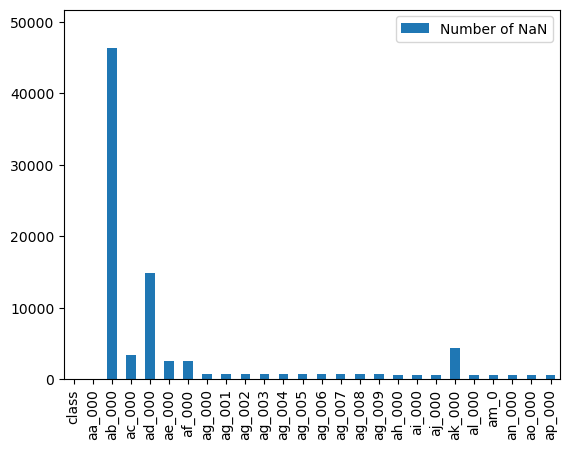

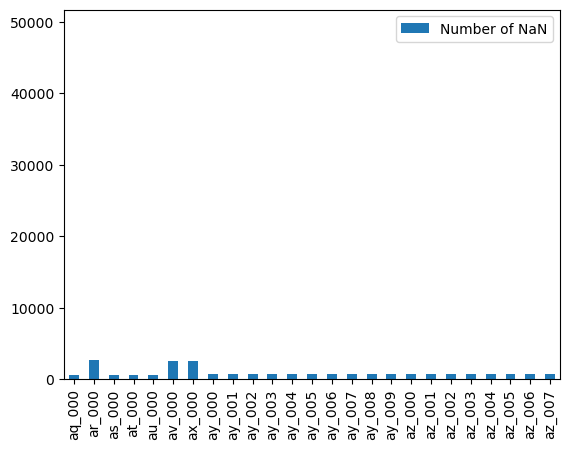

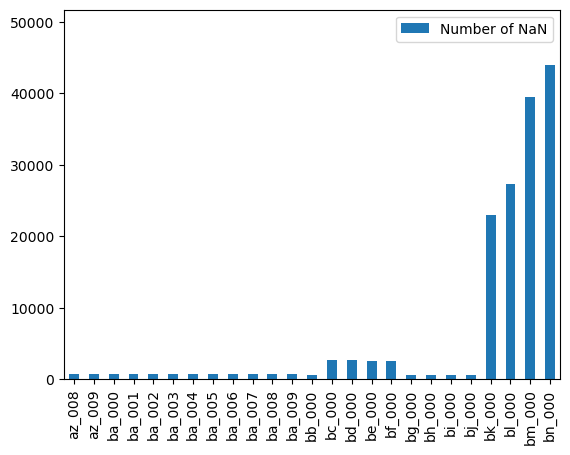

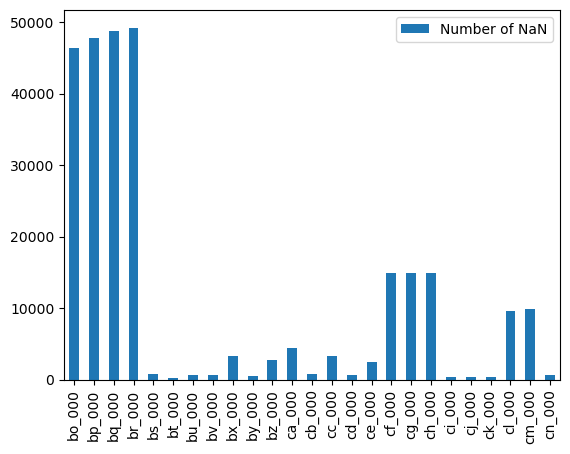

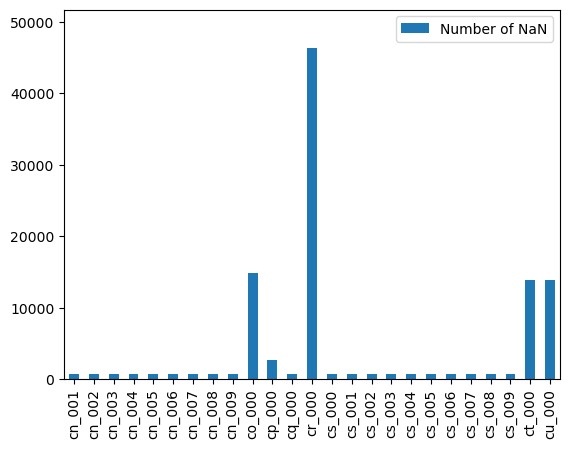

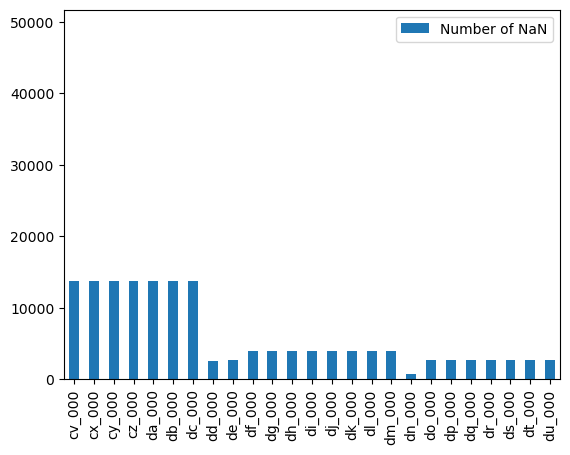

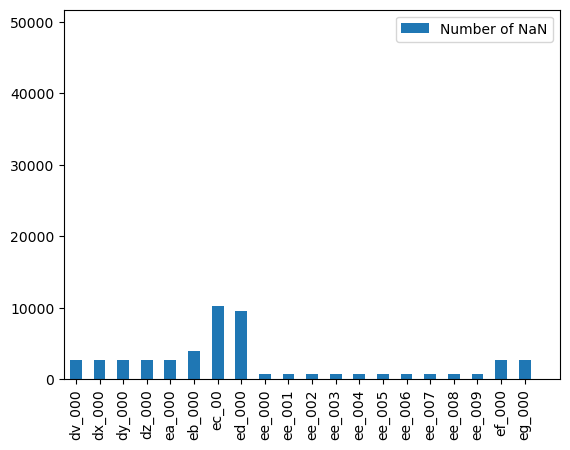

In [105]:
ax = represent_numberNan.plot.bar()
ax.set_xlim(-0.5,25.5)
ax1 = represent_numberNan.plot.bar()
ax1.set_xlim(25.5,50.5)
ax2 = represent_numberNan.plot.bar()
ax2.set_xlim(50.5,75.5)
ax3 = represent_numberNan.plot.bar()
ax3.set_xlim(75.5,100.5)
ax4 = represent_numberNan.plot.bar()
ax4.set_xlim(100.5,125.5)
ax5 = represent_numberNan.plot.bar()
ax5.set_xlim(125.5,150.5)
ax6 = represent_numberNan.plot.bar()
ax6.set_xlim(150.5,171.5)

In [28]:
data_cleaned.head()

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,NaN,2.130706e+09,280.0,0.0,0.0,0.0,0.0,0.0,...,1240520.0,493384.0,721044.0,469792.0,339156.0,157956.0,73224.0,0.0,0.0,0.0
1,neg,33058,NaN,0.000000e+00,NaN,0.0,0.0,0.0,0.0,0.0,...,421400.0,178064.0,293306.0,245416.0,133654.0,81140.0,97576.0,1500.0,0.0,0.0
2,neg,41040,NaN,2.280000e+02,100.0,0.0,0.0,0.0,0.0,0.0,...,277378.0,159812.0,423992.0,409564.0,320746.0,158022.0,95128.0,514.0,0.0,0.0
3,neg,12,0.0,7.000000e+01,66.0,0.0,10.0,0.0,0.0,0.0,...,240.0,46.0,58.0,44.0,10.0,0.0,0.0,0.0,4.0,32.0
4,neg,60874,NaN,1.368000e+03,458.0,0.0,0.0,0.0,0.0,0.0,...,622012.0,229790.0,405298.0,347188.0,286954.0,311560.0,433954.0,1218.0,0.0,0.0


# Exploratory analysis

In [29]:
data_cleaned.describe()

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [30]:
mean_exploration=data_cleaned.describe(include='all').loc['mean']

In [31]:
mean_exploration=mean_exploration.to_frame()
mean_exploration.head()

,mean
class,NaN
aa_000,59336.499567
ab_000,0.713189
ac_000,356014263.031466
ad_000,190620.639314


In [32]:
mean_exploration=mean_exploration.rename(columns={"mean": "mean_value"})
mean_exploration.head()

,mean_value
class,NaN
aa_000,59336.499567
ab_000,0.713189
ac_000,356014263.031466
ad_000,190620.639314


In [53]:
mean_exploration.index=mean_exploration.index
mean_exploration.index.name='Columns_name'
mean_exploration=mean_exploration.reset_index()

In [83]:
mean_exploration.Columns_name

0       class
1      aa_000
2      ab_000
3      ac_000
4      ad_000
        ...  
166    ee_007
167    ee_008
168    ee_009
169    ef_000
170    eg_000
Name: Columns_name, Length: 171, dtype: object

((-7.450000000000001, 178.45), (-17800713.151108053, 373814976.1830168))

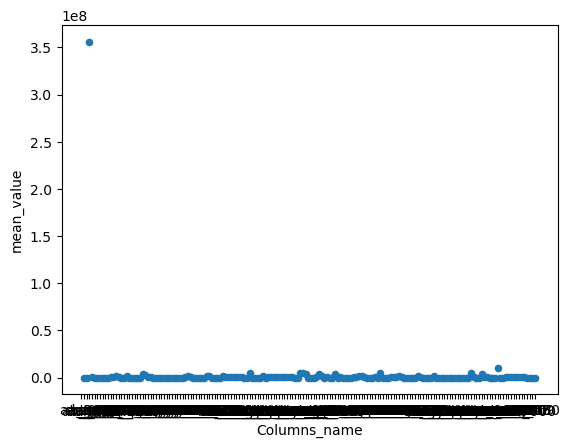

In [65]:
ax=mean_exploration.plot.scatter(x='Columns_name', y='mean_value')
ax.get_xlim(),ax.get_ylim()



C:\Users\Asus\AppData\Local\Temp\ipykernel_29420\1299378369.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(mean_exploration.Columns_name,rotation=90)
C:\Users\Asus\AppData\Local\Temp\ipykernel_29420\1299378369.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(mean_exploration.Columns_name,rotation=90)
C:\Users\Asus\AppData\Local\Temp\ipykernel_29420\1299378369.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_xticklabels(mean_exploration.Columns_name,rotation=90)
C:\Users\Asus\AppData\Local\Temp\ipykernel_29420\1299378369.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_xticklabels(mean_exploration.Columns_name,rotation=90)
C:\Users\Asus\AppData\Local\Temp\ipykernel_29420\1299378369.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax5.set_xticklabels(mean_expl

[Text(0, 0, 'class'),
 Text(1, 0, 'aa_000'),
 Text(2, 0, 'ab_000'),
 Text(3, 0, 'ac_000'),
 Text(4, 0, 'ad_000'),
 Text(5, 0, 'ae_000'),
 Text(6, 0, 'af_000'),
 Text(7, 0, 'ag_000'),
 Text(8, 0, 'ag_001'),
 Text(9, 0, 'ag_002'),
 Text(10, 0, 'ag_003'),
 Text(11, 0, 'ag_004'),
 Text(12, 0, 'ag_005'),
 Text(13, 0, 'ag_006'),
 Text(14, 0, 'ag_007'),
 Text(15, 0, 'ag_008'),
 Text(16, 0, 'ag_009'),
 Text(17, 0, 'ah_000'),
 Text(18, 0, 'ai_000'),
 Text(19, 0, 'aj_000'),
 Text(20, 0, 'ak_000'),
 Text(21, 0, 'al_000'),
 Text(22, 0, 'am_0'),
 Text(23, 0, 'an_000'),
 Text(24, 0, 'ao_000'),
 Text(25, 0, 'ap_000'),
 Text(26, 0, 'aq_000'),
 Text(27, 0, 'ar_000'),
 Text(28, 0, 'as_000'),
 Text(29, 0, 'at_000'),
 Text(30, 0, 'au_000'),
 Text(31, 0, 'av_000'),
 Text(32, 0, 'ax_000'),
 Text(33, 0, 'ay_000'),
 Text(34, 0, 'ay_001'),
 Text(35, 0, 'ay_002'),
 Text(36, 0, 'ay_003'),
 Text(37, 0, 'ay_004'),
 Text(38, 0, 'ay_005'),
 Text(39, 0, 'ay_006'),
 Text(40, 0, 'ay_007'),
 Text(41, 0, 'ay_008'),
 Text

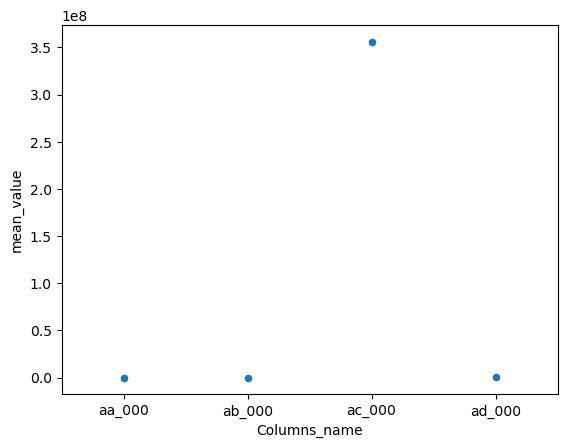

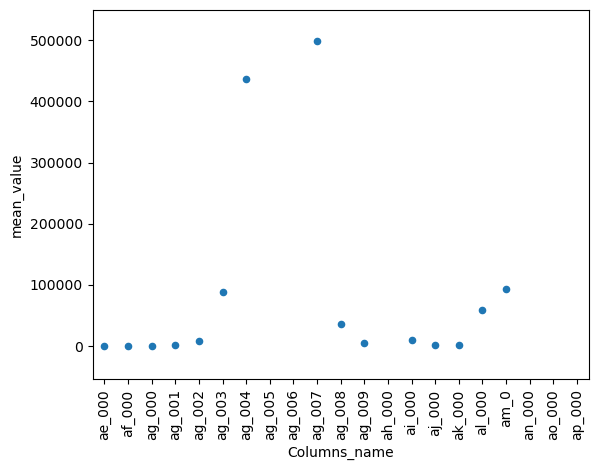

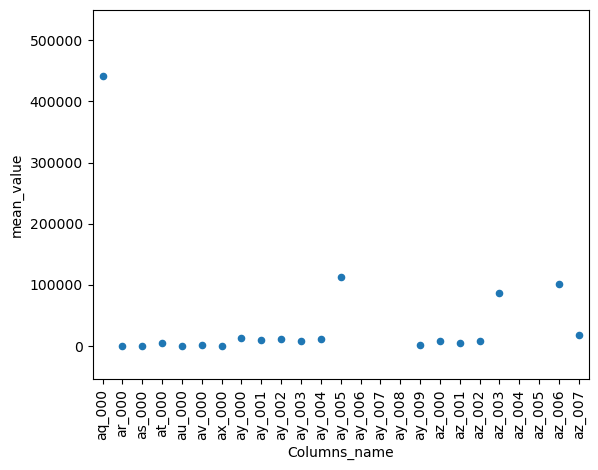

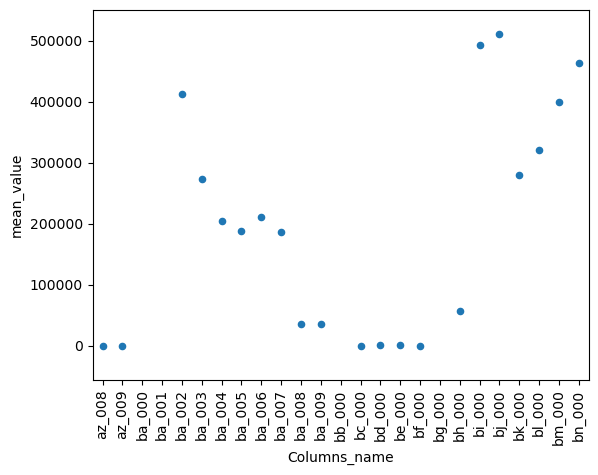

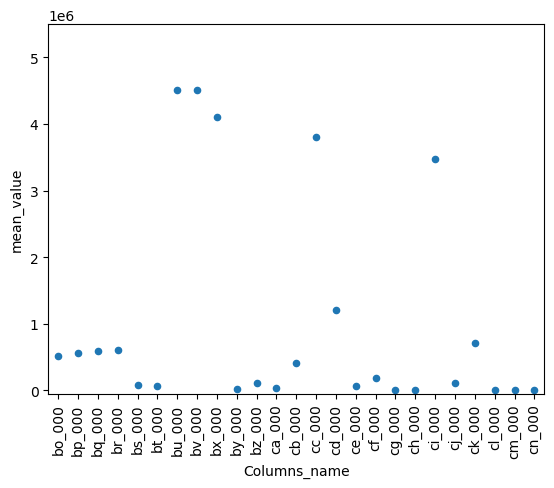

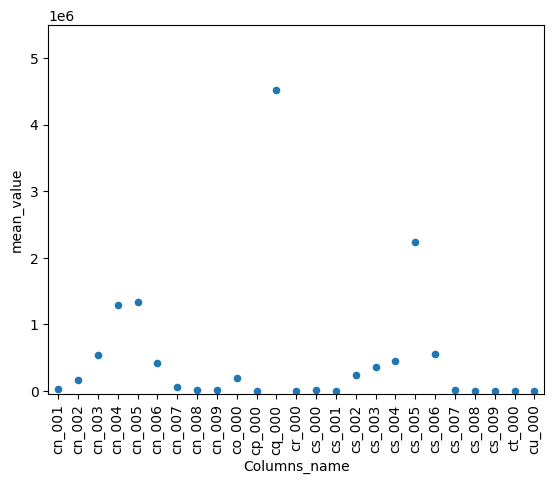

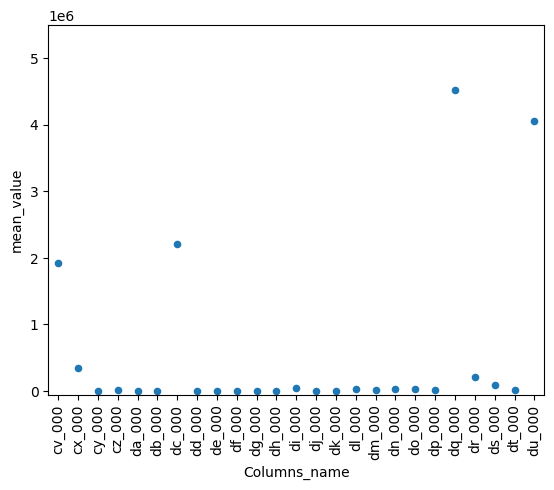

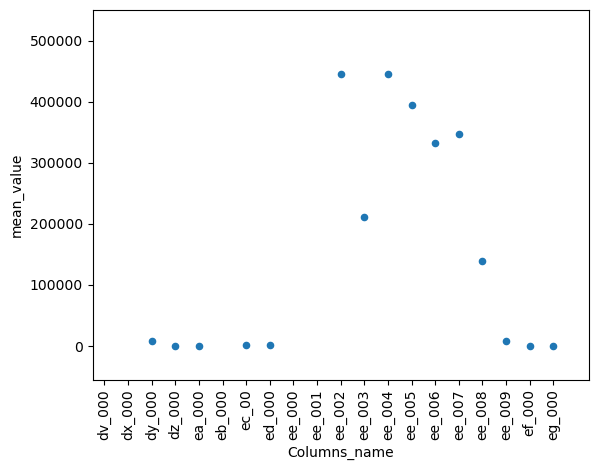

In [89]:
ax=mean_exploration.plot.scatter(x='Columns_name', y='mean_value')
ax.set_xlim(0.5, 4.5)

ax1=mean_exploration.plot.scatter(x='Columns_name', y='mean_value')
ax1.set_xlim(4.5, 25.5)
ax1.set_ylim(-5.5*10**(4), 5.5*10**(5))
ax1.set_xticklabels(mean_exploration.Columns_name,rotation=90)

ax2=mean_exploration.plot.scatter(x='Columns_name', y='mean_value')
ax2.set_xlim(25.5, 50.5)
ax2.set_ylim(-5.5*10**(4), 5.5*10**(5))
ax2.set_xticklabels(mean_exploration.Columns_name,rotation=90)

ax3=mean_exploration.plot.scatter(x='Columns_name', y='mean_value')
ax3.set_xlim(50.5, 75.5)
ax3.set_ylim(-5.5*10**(4), 5.5*10**(5))
ax3.set_xticklabels(mean_exploration.Columns_name,rotation=90)

ax4=mean_exploration.plot.scatter(x='Columns_name', y='mean_value')
ax4.set_xlim(75.5, 100.5)
ax4.set_ylim(-5.5*10**(4), 5.5*10**(6))
ax4.set_xticklabels(mean_exploration.Columns_name,rotation=90)

ax5=mean_exploration.plot.scatter(x='Columns_name', y='mean_value')
ax5.set_xlim(100.5, 125.5)
ax5.set_ylim(-5.5*10**(4), 5.5*10**(6))
ax5.set_xticklabels(mean_exploration.Columns_name,rotation=90)

ax6=mean_exploration.plot.scatter(x='Columns_name', y='mean_value')
ax6.set_xlim(125.5, 150.5)
ax6.set_ylim(-5.5*10**(4), 5.5*10**(6))
ax6.set_xticklabels(mean_exploration.Columns_name,rotation=90)

ax7=mean_exploration.plot.scatter(x='Columns_name', y='mean_value')
ax7.set_xlim(150.5, 171.5)
ax7.set_ylim(-5.5*10**(4), 5.5*10**(5))
ax7.set_xticklabels(mean_exploration.Columns_name,rotation=90)

In [102]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: float64(169), int64(1), object(1)
memory usage: 78.3+ MB


In [34]:
data_cleaned['class'].value_counts()

neg    59000
pos     1000
Name: class, dtype: int64

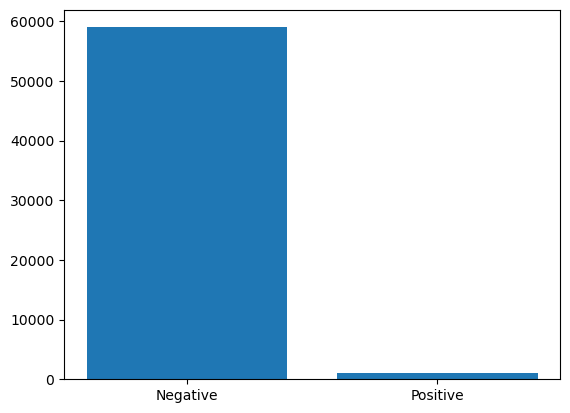

In [35]:
y_pos = np.arange(2) 
plt.bar(y_pos, list(data_cleaned['class'].value_counts()))
plt.xticks(y_pos, ["Negative", "Positive"]) 
plt.show()

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='aa_000', ylabel='Density'>

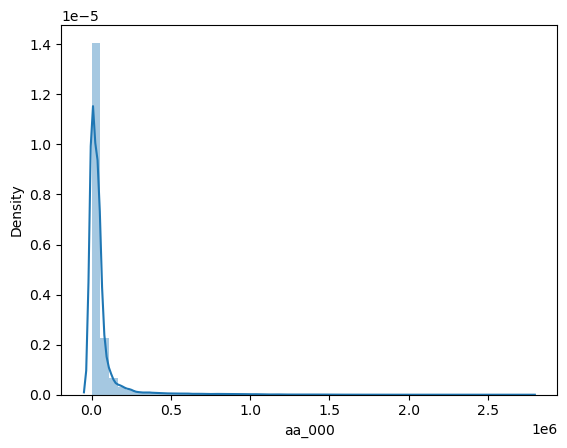

In [36]:
sns.distplot(data_cleaned['aa_000'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ag_001', ylabel='Density'>

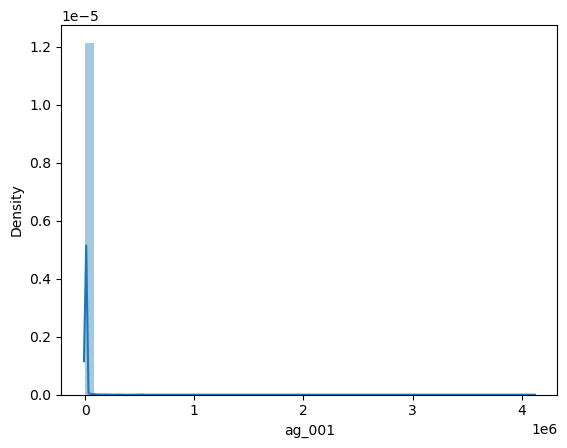

In [37]:
sns.distplot(data_cleaned['ag_001'])

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ag_002', ylabel='Density'>

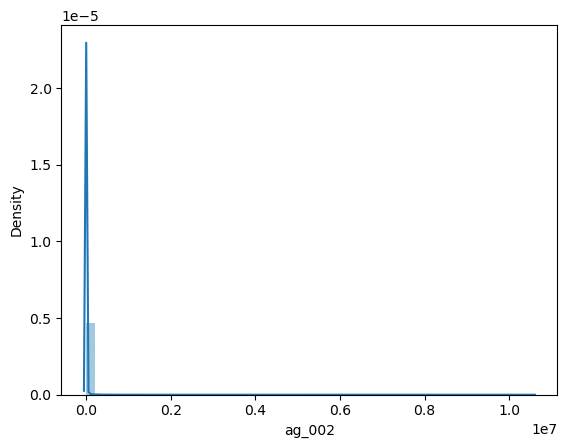

In [38]:
sns.distplot(data_cleaned['ag_002'])

# Artem Part

In [91]:
data_cleaned_of_NaN=data_cleaned.dropna()
data_cleaned_of_NaN

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
16,neg,31300,0.0,784.0,740.0,0.0,0.0,0.0,0.0,0.0,...,798872.0,112724.0,51736.0,7054.0,6628.0,27600.0,2.0,2.0,0.0,0.0
179,neg,97000,0.0,378.0,160.0,0.0,0.0,0.0,0.0,0.0,...,1078982.0,313334.0,511330.0,552328.0,871528.0,871104.0,1980.0,42.0,0.0,0.0
225,neg,124656,2.0,278.0,170.0,0.0,0.0,0.0,0.0,0.0,...,1205696.0,866148.0,697610.0,700400.0,1900386.0,437532.0,3680.0,0.0,0.0,0.0
394,pos,281324,2.0,3762.0,2346.0,0.0,0.0,4808.0,215720.0,967572.0,...,624606.0,269976.0,638838.0,1358354.0,819918.0,262804.0,2824.0,0.0,0.0,0.0
413,pos,43482,0.0,1534.0,1388.0,0.0,0.0,0.0,0.0,40024.0,...,497196.0,121166.0,202272.0,232636.0,645690.0,50.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59432,neg,118028,0.0,740.0,714.0,618.0,690.0,0.0,0.0,0.0,...,838952.0,631338.0,541036.0,1285274.0,1832658.0,165838.0,3022.0,0.0,0.0,0.0
59562,neg,229916,0.0,616.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59843,neg,224084,0.0,912.0,766.0,0.0,0.0,0.0,0.0,0.0,...,413576.0,209524.0,469894.0,2233992.0,5933084.0,364450.0,12422.0,0.0,0.0,0.0
59870,neg,197332,0.0,658.0,616.0,216.0,346.0,0.0,0.0,0.0,...,73940.0,49896.0,90454.0,575264.0,104600.0,10352.0,36.0,0.0,0.0,0.0


In [92]:
data_cleaned_of_NaN['class'].value_counts()

neg    515
pos     76
Name: class, dtype: int64

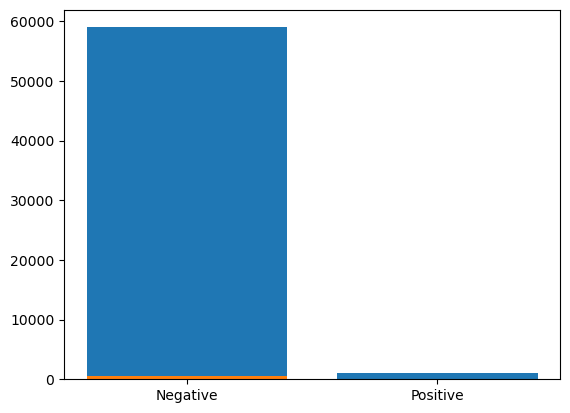

In [100]:
y_pos = np.arange(2) 
plt.bar(y_pos, list(data_cleaned['class'].value_counts()))
plt.bar(y_pos, list(data_cleaned_of_NaN['class'].value_counts()))
plt.xticks(y_pos, ["Negative", "Positive"]) 
plt.xticks(y_pos, ["Negative", "Positive"]) 
plt.show()

# Vlad Part